# Histogram Equilization and Histogram Specification
In this assignment we will learn about histograms, some of their applications and techinques used to play with them 

### Utils
To initialise the assignment, run these 3 cells only once

In [1]:
#taken from this StackOverflow answer: https://stackoverflow.com/a/39225039
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

file_id = '1gCiAZnEiEzOsrfU97Z7lk0pjDhiBnfF0'
destination = '/content/dataset.zip'
download_file_from_google_drive(file_id, destination)

In [2]:
!unzip -q dataset.zip
!rm -rf dataset.zip

In [3]:
import cv2
import matplotlib.pyplot as plt

def load_image(number):
  img = cv2.imread(f"/content/original_images/img{number}.bmp")
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return gray

def show_image(image):
  plt.figure(figsize=(12,5))
  plt.imshow(image,cmap='gray')
  plt.axis('off')
  plt.show()

def calculate_hist(gray):
  fig,ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].imshow(gray,cmap="gray")
  ax[0].axis('off')
  ax[0].set_title("Image")

  ax[1].hist(gray.ravel(), bins=32, range=(0.0, 256.0), ec='k') #calculating histogram
  ax[1].set_title("Histogram")
  ax[1].set_xlabel("range")
  plt.show()

def compare_matched_hist(src,dst,matched_src):
  images = [src,dst,matched_src]
  headings = ["Source","Destination","Matched Source"]
  n,m = len(images),2
  fig,ax = plt.subplots(n,m,figsize=(15,10))

  for i, (heading,img) in enumerate(zip(headings,images)):
    ax[i,0].imshow(img,cmap="gray")
    ax[i,0].axis('off')
    ax[i,0].set_title(heading)

    ax[i,1].hist(img.ravel(), bins=32, range=(0.0, 256.0), ec='k') #calculating histogram
  plt.show()

### Question 1: What are Histograms?
[1 mark]

Histograms are the frequency distribution graphs which shows how often different value in a set of data occurs. In a Image, a histogram is the frequency distribution chart of the pixels. It represents the intensity distribution of the image. Hence, we can get estimate of the number of pixels in an image having a specific intensity value. Let us take an example to understand the histogram in detail.

 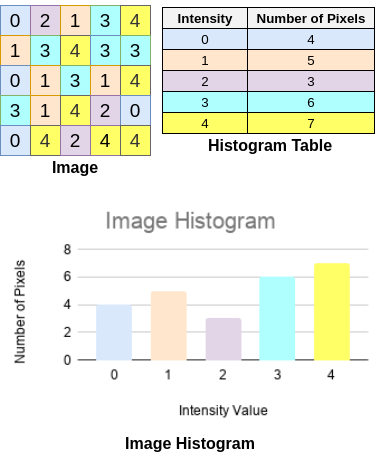

 In the above image, we can see that the pixel values are given in 2D array. We will count the frequency of each pixel appearing in the image. On plotting the frequency with respect to the pixel value the histogram will look like the above plot.

 References:
 https://towardsdatascience.com/histogram-matching-ee3a67b4cbc1
 


### Questions 2: Applications of Histograms?
[1]


Application of Histograms are as follows:

1.  Histograms are widely used in image processing. They are used for the analysis of the image. Hence, they can be used to predict about images. 

2. Histograms are used for image brightness also. Another application is image editing. We can adjust parameters like sharpness, contrast, warmth etc. by adjusting the histograms of the image. 

3. We can use histograms for equalizing an image. 

4. In computer vision, we use histograms for thresholding.

5. Histograms are used in forcasting the weather, stocks trading, business analysis, strategic decision makings and predicting the outcomes and many more.

6. We can identify the data symmetry using histograms. We can also tell about the skewness of the data by using the histograms.

## Histogram Equalizing


### Question 3: What is Histogram Equalizaiton 
[1]

Histogram equalization is the technique that tries to equalize the frequency of pixels in an image. Given an image, we try to enhance the contrast by histogram equalization. CDF is the common way of equalizing the histogram. When the image has narrow range of intensity values i.e. when the frequency of some pixels in the image is low, the histogram equalization helps those pixels to gain some intensity(frequency). Hence, the areas having lower local contrast can gain higher contrast. Histogram equalization uses the CDF to achieve the task of enhancing the contrast. 

### Question 4 
below are some inbuilt examples of histogram equalizing from OpenCV, your task is to reproduce them without using any inbuilts, you can use the function `calculate_hist` to show insights, also **explain your results comparing** with inbuilt. [1+1]

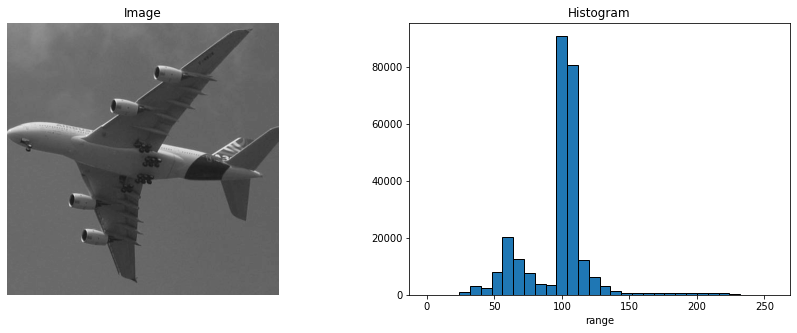

In [4]:
gray = load_image(3)
calculate_hist(gray)

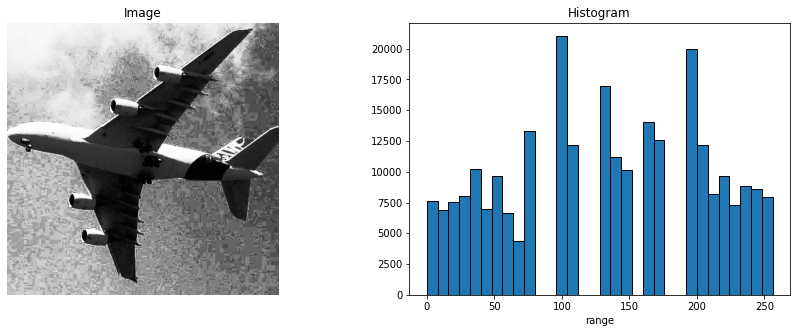

In [ ]:
equalized_gray = cv2.equalizeHist(gray)
calculate_hist(equalized_gray)

In [5]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
def get_histogram(image):
    histogram = np.zeros(256)
    if image.ndim==2:
      m,n=image.shape[0],image.shape[1]
      for  i in range((m)):
        for j in range((n)):
          histogram[image[i][j]]+=1
    else:
      for pixel in image:
        histogram[pixel]+=1
 
    return histogram

def cumdisfun(a):
  a=list(a)
  ans=[]
  ans.append(a[0])
  for i in range(1,len(a)):
    ans.append(ans[i-1]+a[i])
  return np.array(ans)

def my_equalizing_histograms(src):
  """
  :param src: input image
  :rtype: image 
  :return dest: histogram equalized src image
  """
  
  src=np.asarray(src)
 
  flatten_src=src.flatten()

  hist_flatten=get_histogram(flatten_src)

  final=cumdisfun(hist_flatten)

  mini=final.min()
  maxa=final.max()
  final = (final -mini) * 255 / (maxa - mini)

  final = final.astype('uint8')

  final_img= final[flatten_src]

  final_img = np.reshape(final_img, src.shape)

  
  # calculate_hist(src)
  # calculate_hist(final_img)
  return final_img

Enter the image number: 
5
Input Image:


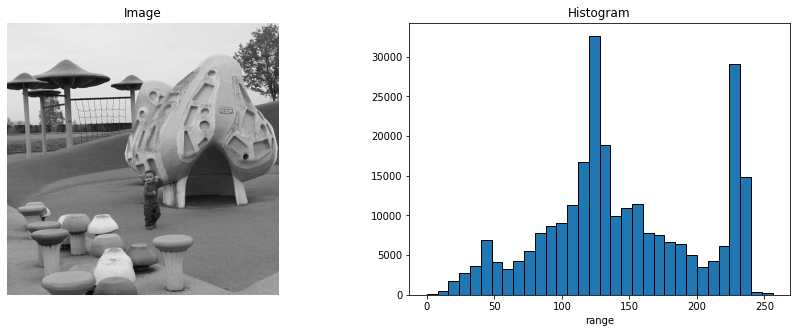

Results of my_equalizing_histogram function:


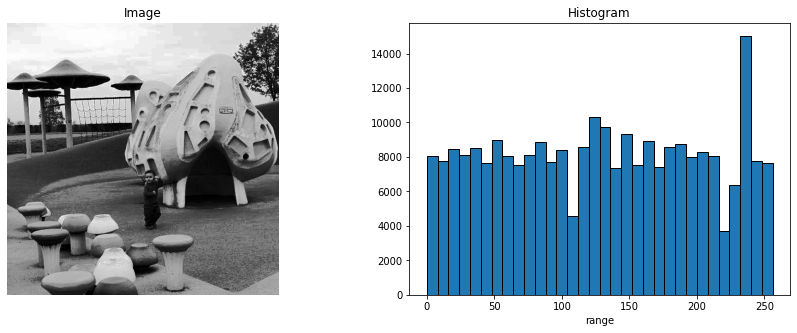

Results of Inbuilt function: 


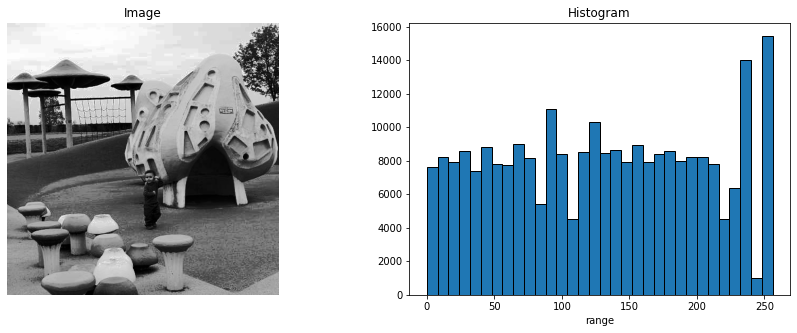

The psnr loss between source image and my_equalizing_histogram function's output is : 19.94025789475074
The psnr loss between source image and Inbuilt function's output is : 20.020594251280244




In [6]:
# [TODO] Observation and comparisons
from skimage import metrics
def compare(src):
  dest=my_equalizing_histograms(src)
  print('Input Image:')
  calculate_hist(src)

  print('Results of my_equalizing_histogram function:')
  calculate_hist(dest)

  print('Results of Inbuilt function: ')
  equalized_gray = cv2.equalizeHist(src)
  calculate_hist(equalized_gray)
  print("The psnr loss between source image and my_equalizing_histogram function's output is : " +str(metrics.peak_signal_noise_ratio(src,dest)))
  print("The psnr loss between source image and Inbuilt function's output is : " +str(metrics.peak_signal_noise_ratio(src,equalized_gray)))
  print('\n')
print('Enter the image number: ')
T=int(input())
src=load_image(T)
compare(src)

# The first image is input image and its histogram
# The second images are output of my_equalizing_histogram function
# The third images are output of inbuilt function cv2.equalizeHist

# As you can see the psnr loss between source image & my_equalizing_histogram function's output is very close to psnr loss between 
# source image and Inbuilt function's output. Hence we can say that our function is performing very similar to the inbuilt function. 
# We can further observe that the histogram of the output image has similar peak for all the pixel values. Thus equalizing task has been done 
# properly. We can clearly see that the histograms of images through our function and built-in function are close to each other.  


## Histogram Matching

### Question 5: What is Histogram Matching
[1]

Histogram matching is a technique in which the we try to match the histogram of source image with the hisogram of the destination image. Histogram equalization is the special case of histogram matching in which the histogram is uniformly distributed. 

Given 2 images: source image and destination image, we first find the cdf of both images then for each pixel of source image we find the pixel from destination image such that cdf(pixel_source image)=cdf(pixel_ destination). The output image will be the histogram matched source image. 

Hence, in this way we can apply the histogram matching algorithm on the images. 


### Question 6
below are some inbuilt examples of histogram matching from scikit image, your task is to reproduce them without using any inbuilts, you can use the function `compare_matched_hist` to show insights, also **explain your results comparing** with inbuilt.
[2+1]

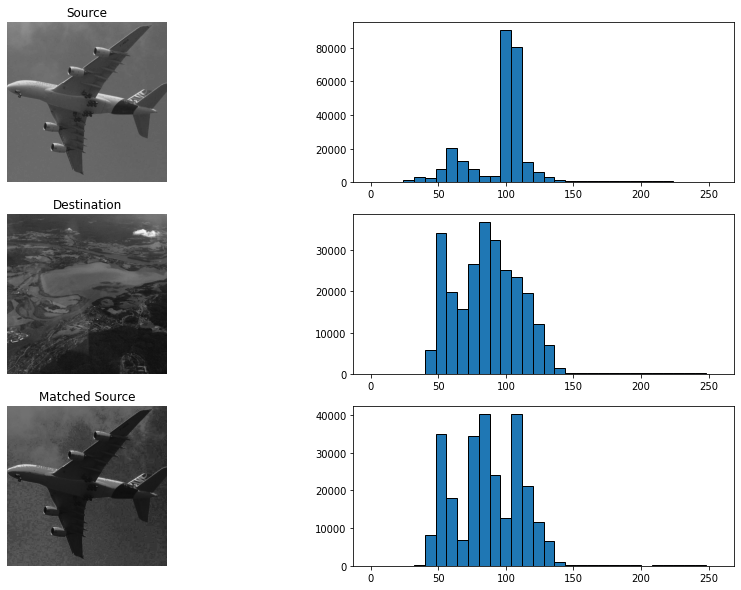

In [7]:
from skimage import exposure

src = load_image(3)
dst = load_image(4)
matched_src = exposure.match_histograms(src,dst)

compare_matched_hist(src,dst,matched_src)

In [8]:
def bst(value, array):
    l=0
    r=len(array)-1
    while(l<=r):
      mid = l + (r - l) // 2;

      if array[mid][0] == value:
          return array[mid][1]
      elif array[mid][0] < value:
          l = mid + 1
      else:
          r = mid - 1
    maxa=min(mid,len(array)-1)
    mini=max(mid-1,0)
    if (array[maxa][0]-value)>(value-array[mini][0]):
      return array[mini][1]      
    return array[maxa][1]
def my_matching_histograms(src,dest):
  """
  :param src: input image
  :param dst: reference image
  :rtype: image 
  :return mathced_src: histogram matched src image
  """
  

  equal_src_hist=np.asarray(get_histogram(src))
  equal_dest_hist=np.asarray(get_histogram(dest))

  equal_src_hist=(cumdisfun(equal_src_hist))
  equal_dest_hist=(cumdisfun(equal_dest_hist))

  D1={}
  D2={}

  for i in range(1,len(equal_src_hist)):
    if equal_src_hist[i]!=equal_src_hist[i-1]:
      if i==1:
        D1[i-1]=equal_src_hist[i-1]
        D1[i]=equal_src_hist[i]
      else:
        D1[i]=equal_src_hist[i]
  for i in range(1,len(equal_dest_hist)):
    if equal_dest_hist[i]!=equal_dest_hist[i-1]:
      if i==1:
        D2[i-1]=equal_dest_hist[i-1]
        D2[i]=equal_dest_hist[i]
      else:
        D2[i]=equal_dest_hist[i]

  final_arr={}
  temp=[]
  tempx=[]

  for i in D1:
    temp.append([D1[i],i])
  for i in D2:
    tempx.append([D2[i],i])


  tempx.sort(key=lambda x:x[0])

  for i in D1:
    temp1=bst(D1[i],tempx)
    final_arr[i]=temp1

  desty=[[0 for i in range(src.shape[0])]for j in range(src.shape[1])]
  for i in range(src.shape[0]):
    for j in range(src.shape[1]):
      temp2=(src[i,j])
      desty[i][j]=final_arr[temp2]
  desty=np.asarray(desty)

  # compare_matched_hist(src,dest,desty)
  return desty

Enter the source image number: 
3
Enter the destination image number: 
4


Results of my_matching_histogram function: 


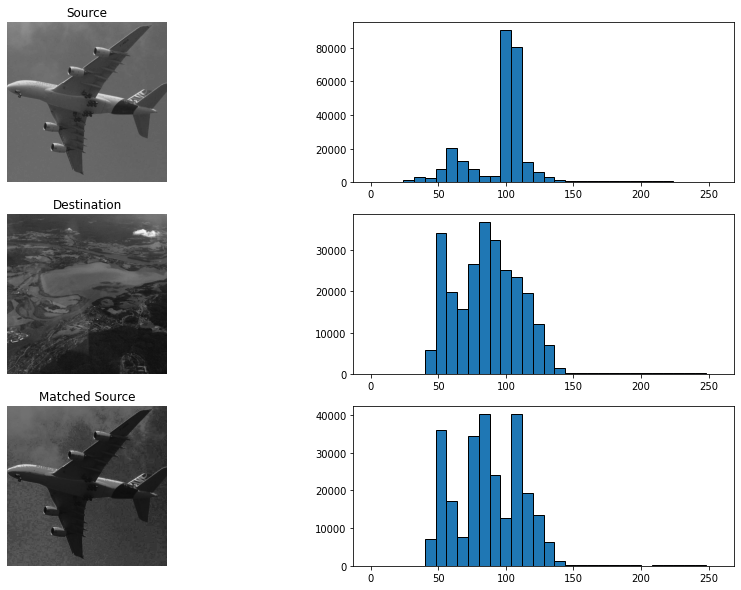

Results of Inbuilt function: 


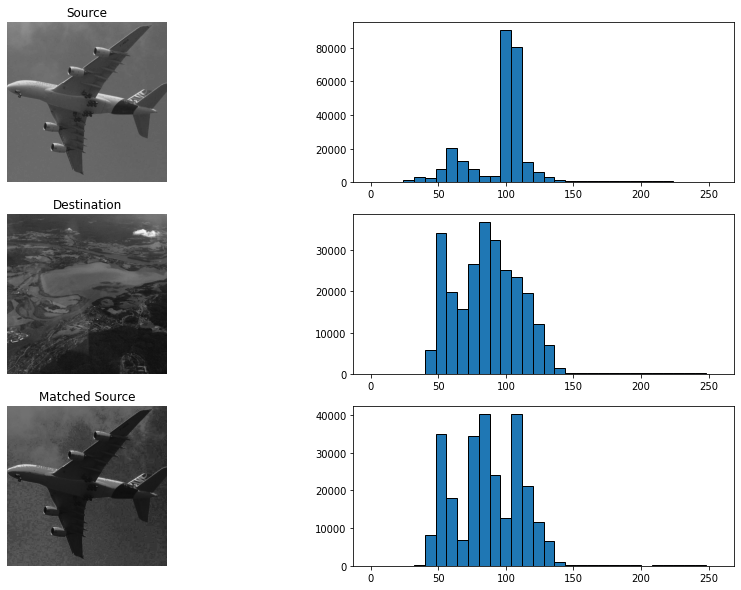

The psnr loss between source image and my_matching_histogram function's output is : 24.824783294394738
The psnr loss between source image and Inbuilt function's output is : 24.882798943431524




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  app.launch_new_instance()


In [9]:
# [TODO] Observation and comparisons
from skimage import exposure
from skimage import metrics
def compare2(src,dest):
  ##### my_matching_histogram ########
  print('Results of my_matching_histogram function: ')
  desty=my_matching_histograms(src,dest)
  compare_matched_hist(src,dest,desty)

  print('Results of Inbuilt function: ')
  ######## Inbuilt function ##########
  matched_src = exposure.match_histograms(src,dest)
  compare_matched_hist(src,dest,matched_src)

  print("The psnr loss between source image and my_matching_histogram function's output is : " +str(metrics.peak_signal_noise_ratio(src,desty)))
  print("The psnr loss between source image and Inbuilt function's output is : " +str(metrics.peak_signal_noise_ratio(src,matched_src)))

  print('\n')
print('Enter the source image number: ')
T1=int(input())
print('Enter the destination image number: ')
T2=int(input())
print('\n')
src=load_image(T1)
dest=load_image(T2)
compare2(src,dest)

# As you can see the psnr loss between source image & my_matching_histogram function's output is very close to psnr loss between 
# source image and Inbuilt function's output. Hence we can say that our function is performing very similar to the inbuilt function. 
# We can clearly see that the histogram of the histogram matched source image matches with the histogram of the destination image. Hence
# we were able to achieve the task of histogram matching successfully.  

### Question 7
Checking optimization
[1]

In [10]:
src = load_image(3)
dst = load_image(4)

In [11]:
%%timeit

my_equalizing_histograms(src)
my_matching_histograms(src,dst)

1 loop, best of 5: 1.19 s per loop


#Note: If you want images as output in the above function, comment out the following lines:calculate_hist(src) and calculate_hist(final_img) from my_equalizing_histograms function and compare_matched_hist(src,dest,desty) line from my_matching_histograms.